# Ergodic MACD 

https://www.motivewave.com/studies/ergodic_macd.htm

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AAPL'
start = '2018-08-01'
end = '2019-01-01'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-08-01,49.782501,50.439999,49.327499,50.375000,48.208736,271742800
2018-08-02,50.145000,52.095001,50.087502,51.847500,49.617908,249616000
2018-08-03,51.757500,52.185001,51.369999,51.997501,49.761471,133789600
2018-08-06,52.000000,52.312500,51.767502,52.267502,50.019855,101701600
2018-08-07,52.330002,52.375000,51.689999,51.777500,49.550919,102349600


In [3]:
fast_period=12
slow_period=26
signal_period=9
fast_ema = df['Close'].ewm(span=fast_period, adjust=False).mean()
slow_ema = df['Close'].ewm(span=slow_period, adjust=False).mean()
ema_diff = fast_ema - slow_ema
erg_ema = ema_diff.ewm(span=signal_period, adjust=False).mean()
df['Ergodic_MACD'] = ema_diff - erg_ema

In [4]:
df = df.dropna()
df.head()

,Open,High,Low,Close,Adj Close,Volume,Ergodic_MACD
Date,,,,,,,
2018-08-01,49.782501,50.439999,49.327499,50.375000,48.208736,271742800,0.000000
2018-08-02,50.145000,52.095001,50.087502,51.847500,49.617908,249616000,0.093972
2018-08-03,51.757500,52.185001,51.369999,51.997501,49.761471,133789600,0.157303
2018-08-06,52.000000,52.312500,51.767502,52.267502,50.019855,101701600,0.205411
2018-08-07,52.330002,52.375000,51.689999,51.777500,49.550919,102349600,0.192484


In [5]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,Ergodic_MACD
Date,,,,,,,
2018-12-24,37.037498,37.887501,36.647499,36.707500,35.375172,148676800,-0.280509
2018-12-26,37.075001,39.307499,36.680000,39.292500,37.866356,234330000,-0.146817
2018-12-27,38.959999,39.192501,37.517502,39.037498,37.620605,212468400,-0.049929
2018-12-28,39.375000,39.630001,38.637501,39.057499,37.639870,169165600,0.036476
2018-12-31,39.632500,39.840000,39.119999,39.435001,38.003681,140014000,0.134512


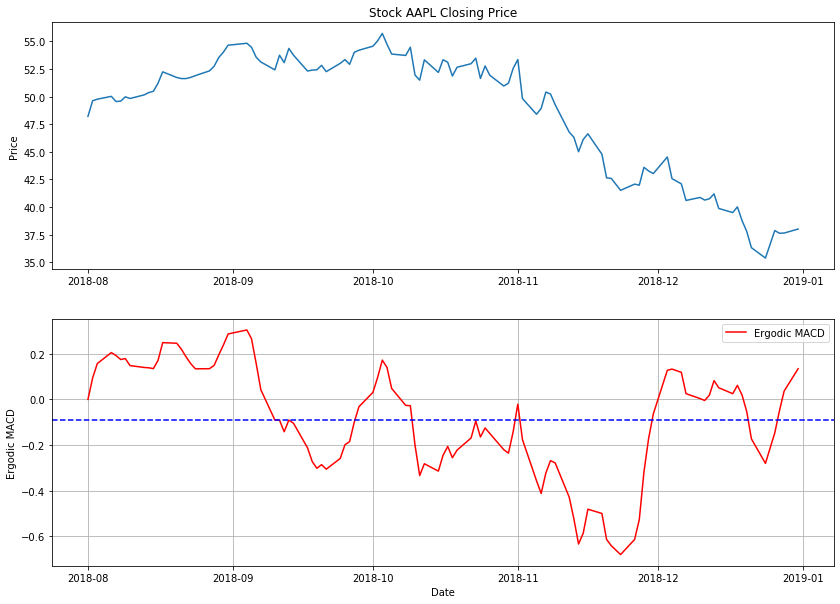

In [6]:
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(df['Adj Close'])
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['Ergodic_MACD'], label='Ergodic MACD', color='red')
ax2.axhline(df['Ergodic_MACD'].mean(), color='blue', linestyle='--')
ax2.grid()
ax2.set_ylabel('Ergodic MACD')
ax2.set_xlabel('Date')
ax2.legend(loc='best')

### Candlestick with Relative Vigor Index

In [7]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Ergodic_MACD,VolumePositive
0,736907.0,49.782501,50.439999,49.327499,50.375000,48.208736,271742800,0.000000,False
1,736908.0,50.145000,52.095001,50.087502,51.847500,49.617908,249616000,0.093972,False
2,736909.0,51.757500,52.185001,51.369999,51.997501,49.761471,133789600,0.157303,False
3,736912.0,52.000000,52.312500,51.767502,52.267502,50.019855,101701600,0.205411,False
4,736913.0,52.330002,52.375000,51.689999,51.777500,49.550919,102349600,0.192484,False


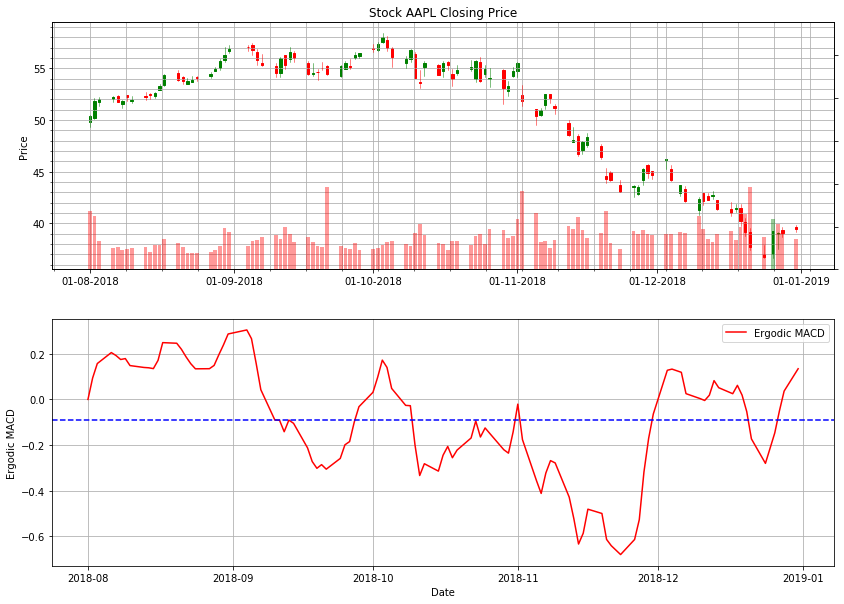

In [8]:
from mplfinance.original_flavor import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['Ergodic_MACD'], label='Ergodic MACD', color='red')
ax2.axhline(df['Ergodic_MACD'].mean(), color='blue', linestyle='--')
ax2.grid()
ax2.set_ylabel('Ergodic MACD')
ax2.set_xlabel('Date')
ax2.legend(loc='best')